In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
from scipy.special import hermite

In [37]:
hbar = 1.054571817E-34
m = 9.1093837E-31
k = 1E-31
w = np.sqrt(k/m)
L = .1
z = np.linspace(-L,L,1000)
x = np.sqrt(m*w/hbar)*z
const = (m*w/(np.pi*hbar))**.25

In [145]:
norm = np.sqrt(integrate.quad(lambda x: (np.cos(np.pi*x/L)**3)**2, -L,L))
norm = 1/norm[0]

psi0 = const*np.exp(-m*w/2/hbar*z**2)
psi1 = const*(1/np.sqrt(2))*2*x*np.exp(-x**2/2)
psi2 = const*(1/np.sqrt(8))*(4*x**2-2)*np.exp(-x**2/2)
psi3 = const*(1/np.sqrt(8*6))*(8*x**3-12*x)*np.exp(-x**2/2)
psi4 = const*(1/np.sqrt(16*24))*(16*x**4-48*x**2+12)*np.exp(-x**2/2)

c0 = integrate.quad(lambda x: norm*np.cos(np.pi*x/L)**3*const*np.exp(-m*w/2/hbar*(x/np.sqrt(m*w/hbar))**2), -L, L)
c0 = c0[0]
c1 = integrate.quad(lambda x: norm*np.cos(np.pi*x/L)**3*const*(1/np.sqrt(2))*2*x*np.exp(-x**2/2), -L, L)
c1 = c1[0]
c2 = integrate.quad(lambda x: norm*np.cos(np.pi*x/L)**3*const*(1/np.sqrt(8))*(4*x**2-2)*np.exp(-x**2/2), -L, L)
c2 = c2[0]
c3 = integrate.quad(lambda x: norm*np.cos(np.pi*x/L)**3*const*(1/np.sqrt(8*6))*(8*x**3-12*x)*np.exp(-x**2/2), -L, L)
c3 = c3[0]
c4 = integrate.quad(lambda x: norm*np.cos(np.pi*x/L)**3*const*(1/np.sqrt(16*24))*(16*x**4-48*x**2+12)*np.exp(-x**2/2), -L, L)
c4 = c4[0]

In [210]:
wave = c0*psi0 + c1*psi1 + c2*psi2 + c3*psi3 + c4*psi4

E = []
for n in np.arange(0,5):
    En = (n+.5)*hbar*w
    E.append(En)

timewave = lambda time: c0*psi0*np.exp(-1j*E[0]*time/hbar) + c1*psi1*np.exp(-1j*E[1]*time/hbar) + c2*psi2*np.exp(-1j*E[2]*time/hbar) + c3*psi3*np.exp(-1j*E[3]*time/hbar) + c4*psi4*np.exp(-1j*E[4]*time/hbar)


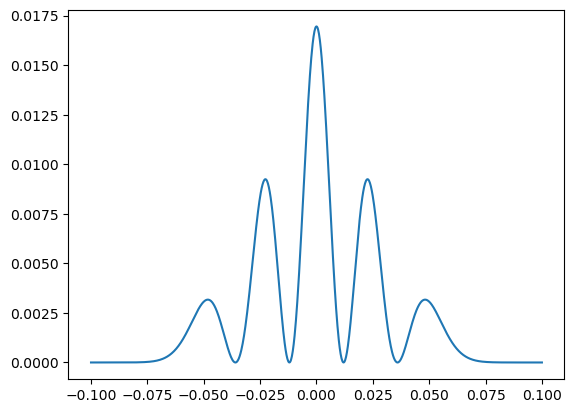

In [163]:
plt.plot(z, wave**2)

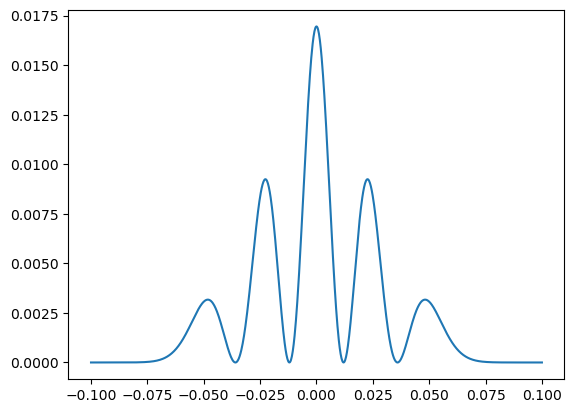

In [232]:
plt.plot(z, timewave(0)*np.conj(timewave(0)))

In [225]:
import imageio

def create_frame(t):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(z, timewave(t)*np.conj(timewave(t)), color = 'grey' )
    plt.xlim([-.1,.1])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([0,.018])
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Quantum Harmonic Oscillator {t}',
              fontsize=14)
    plt.savefig(f'/home/brandon.oneal/School_Work/img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [229]:
time = np.linspace(0,10, 100)
for t in time:
    create_frame(t)

In [230]:
frames = []
for t in time:
    image = imageio.v2.imread(f'/home/brandon.oneal/School_Work/img/img_{t}.png')
    frames.append(image)

In [231]:
imageio.mimsave('img3.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second